# Redes Multicapa para Regresión

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from functions3 import *
import itertools

In [3]:
# import data from csv
data = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/Student_Performance_DEV.csv').drop(columns='idx')
data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,6.326605,6.560017,5.043475,4.958906,4,False
1,7.774666,6.459315,3.529156,9.601236,5,False
2,7.343601,6.487913,2.500939,6.390868,4,False
3,1.851852,10.126572,2.311390,4.000000,5,False
4,3.607081,8.093355,3.419712,4.857238,9,False
...,...,...,...,...,...,...
1395,5.010497,6.481511,2.531747,4.598361,3,False
1396,6.280722,6.056482,5.997887,4.408789,8,False
1397,5.492269,5.402522,5.867482,4.000000,5,False
1398,7.002018,6.425094,5.027055,5.284618,6,False


### a)
Implementar una red neuronal multicapa, que funcione para cualquier valor $L \ge 1$, y $M^{(l)} \ge 1$, así como el algoritmo de optimización de descenso por gradiente y backpropagation para optimizar los pesos de las unidades ocultas, asumiendo una “loss-function” que sea la suma de los errores cuadráticos.

In [4]:
data = one_hot_encoding(data, 'extracurricular_activities')
X = data.drop(columns=['forecasted_performance'])
y = data['forecasted_performance'].values

train_data, test_data = train_test_split(data, test_size=0.2, seed=42)

X_train = train_data.drop(columns=['forecasted_performance'])
y_train = train_data['forecasted_performance'].values

X_test = test_data.drop(columns=['forecasted_performance'])
y_test = test_data['forecasted_performance'].values

X_train

,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities_False,extracurricular_activities_True
0,7.512345,5.072058,8.775325,14,0,1
1,7.645378,5.266626,8.351701,6,0,1
2,7.096499,3.071855,8.498025,2,0,1
3,6.454375,3.299192,9.913947,9,1,0
4,7.731830,2.091205,4.052463,17,1,0
...,...,...,...,...,...,...
1115,8.401831,5.314130,4.808138,16,1,0
1116,6.644282,4.947815,5.392057,2,1,0
1117,7.629650,4.989611,6.980204,9,1,0
1118,8.681235,5.776701,8.484583,9,1,0


In [5]:
nn_1 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 25, 1], activations='default', verbose=False)

# Fit the MLP model to the training data
train_losses_1, test_losses_1 = nn_1.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:12<00:00, 15.55it/s]


In [21]:
print(f"num layers: {nn_1.num_layers}")
print(f"layers: {nn_1.layers}")
print(f"activations: {nn_1.activations}")

num layers: 3
layers: [6, 25, 1]
activations: ['relu', 'relu', 'linear']


In [7]:
nn_2 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 5, 1], verbose=False)

nn_2.activations
# Fit the MLP model to the training data
train_losses_2, test_losses_2 = nn_2.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:16<00:00, 12.24it/s]


In [8]:
nn_3 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 7, 5, 1], verbose=False)

# Fit the MLP model to the training data
train_losses_3, test_losses_3 = nn_3.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:21<00:00,  9.49it/s]


In [9]:
nn_4 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 1, 1], verbose=False)

# Fit the MLP model to the training data
train_losses_4, test_losses_4 = nn_4.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

100%|██████████| 200/200 [00:11<00:00, 16.78it/s]


### b)
Implementar descenso por gradiente estocástico y graficar la evolución del error de entrenamiento en función de las  épocas.

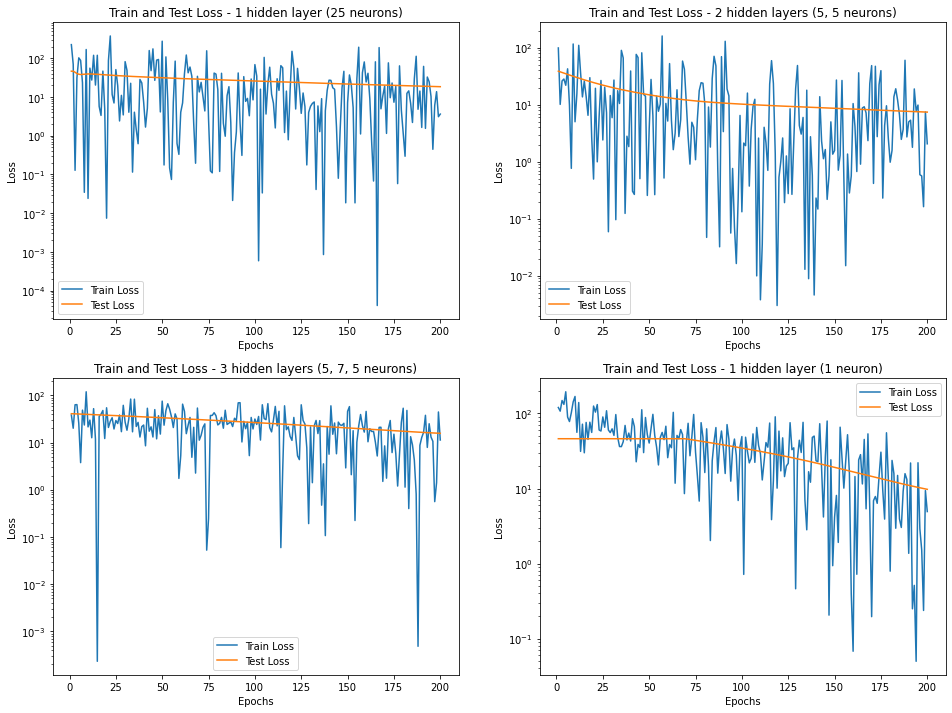

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(range(1, len(train_losses_1) + 1), train_losses_1, label='Train Loss')
axs[0, 0].plot(range(1, len(test_losses_1) + 1), test_losses_1, label='Test Loss')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Train and Test Loss - 1 hidden layer (25 neurons)')
axs[0, 0].legend()

axs[0, 1].plot(range(1, len(train_losses_2) + 1), train_losses_2, label='Train Loss')
axs[0, 1].plot(range(1, len(test_losses_2) + 1), test_losses_2, label='Test Loss')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Train and Test Loss - 2 hidden layers (5, 5 neurons)')
axs[0, 1].legend()

axs[1, 0].plot(range(1, len(train_losses_3) + 1), train_losses_3, label='Train Loss')
axs[1, 0].plot(range(1, len(test_losses_3) + 1), test_losses_3, label='Test Loss')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_title('Train and Test Loss - 3 hidden layers (5, 7, 5 neurons)')
axs[1, 0].legend()

axs[1, 1].plot(range(1, len(train_losses_4) + 1), train_losses_4, label='Train Loss')
axs[1, 1].plot(range(1, len(test_losses_4) + 1), test_losses_4, label='Test Loss')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_title('Train and Test Loss - 1 hidden layer (1 neuron)')
axs[1, 1].legend()

plt.show()

In [11]:
for i in range(1, 5):
    nn = eval(f'nn_{i}')
    predictions = nn.predict(X_test)
    print(f'nn_{i} Predictions:')
    print("  Predictions  |   Test")
    for i in range(len(predictions)):
        print(predictions[i], y_test[i])
    print('\n')
predictions = nn_1.predict(X_test)

nn_1 Predictions:
  Predictions  |   Test
[8.95562165] 9.678152468405315
[10.21656433] 7.337679311836268
[7.47462188] 4.542551445452206
[10.21364265] 4.408466887658554
[6.49847412] 6.5918391130432274
[5.03072638] 7.126303113365252
[1.34579245] 5.824865318066567
[8.72202661] 4.318271770712224
[7.45711866] 2.6946935959490674
[5.61681678] 4.621360632505932
[0.] 6.289601307408167
[5.08792996] 6.659869395546703
[6.95630062] 8.050121380949898
[8.68632477] 1.851851851851852
[4.88318331] 7.629186838253545
[7.62727622] 3.628587783482679
[6.28867375] 6.490047212114392
[4.93858552] 10.0
[5.23185937] 7.926128337307125
[9.80733935] 5.3777726427393455
[5.3764909] 7.71268659291545
[9.96572391] 1.851851851851852
[2.97509418] 6.9952581159936535
[4.19610678] 8.652310141516276
[1.80907471] 8.104721281886103
[5.18352645] 5.10361369184111
[1.06803389] 8.99645782049267
[1.50189301] 6.235928190854355
[6.88200133] 5.7733074895165295
[7.07382552] 7.697125657561498
[6.7855899] 6.698293228713865
[9.99705653] 4.8

### c)
Implementar descenso por gradiente con mini-baches, y graficar la evolución del error de entrenamiento en función de las épocas, para distintos tamaños de baches. Deberáas elegir a tu criterio el tamaño de los mini-batches.

In [12]:
nn_c1 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 25, 1], verbose=False)
# Fit the MLP model to the training data
train_losses_c1, test_losses_c1 = nn_c1.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c2 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 5, 1], verbose=False)
# Fit the MLP model to the training data
train_losses_c2, test_losses_c2 = nn_c2.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c3 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 7, 5, 1],verbose=False)
# Fit the MLP model to the training data
train_losses_c3, test_losses_c3 = nn_c3.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c4 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 1, 1], verbose=False)
# Fit the MLP model to the training data
train_losses_c4, test_losses_c4 = nn_c4.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

100%|██████████| 200/200 [00:11<00:00, 17.46it/s]


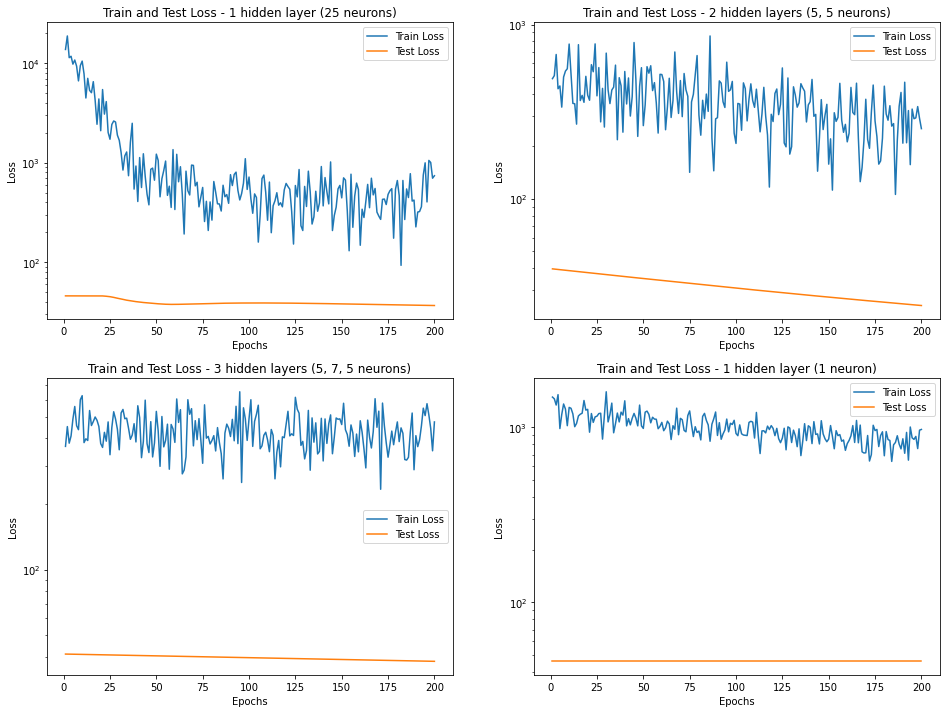

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(range(1, len(train_losses_c1) + 1), train_losses_c1, label='Train Loss')
axs[0, 0].plot(range(1, len(test_losses_c1) + 1), test_losses_c1, label='Test Loss')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Train and Test Loss - 1 hidden layer (25 neurons)')
axs[0, 0].legend()

axs[0, 1].plot(range(1, len(train_losses_c2) + 1), train_losses_c2, label='Train Loss')
axs[0, 1].plot(range(1, len(test_losses_c2) + 1), test_losses_c2, label='Test Loss')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Train and Test Loss - 2 hidden layers (5, 5 neurons)')
axs[0, 1].legend()

axs[1, 0].plot(range(1, len(train_losses_c3) + 1), train_losses_c3, label='Train Loss')
axs[1, 0].plot(range(1, len(test_losses_c3) + 1), test_losses_c3, label='Test Loss')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_title('Train and Test Loss - 3 hidden layers (5, 7, 5 neurons)')
axs[1, 0].legend()

axs[1, 1].plot(range(1, len(train_losses_c4) + 1), train_losses_c4, label='Train Loss')
axs[1, 1].plot(range(1, len(test_losses_c4) + 1), test_losses_c4, label='Test Loss')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_title('Train and Test Loss - 1 hidden layer (1 neuron)')
axs[1, 1].legend()

plt.show()

### d)
Utilizando el set de desarrollo y la metodología de cross-validation, seleccionar los hiperparámetros de la red. Para esto puede usar el algoritmo de gradiente descendiente que usted desee (normalmente, uno querrá usar el optimizador que mejor resultado le haya dado, en cuanto a performance del modelo entrenado y el tiempo de convergencia).

**Sugerencia:** si bien uno puede hacer una búsqueda exhaustiva sobre el espacio de hiperparámetros $L$ y $M^{(l)}$, esto puede resultar computacionalmente demasiado costoso, debido a que para cada combinación y cada fold, se de debe re-entrenar el modelo y evaluarlo. Piense si hay alguna manera de recorrer el espacio de búsqueda con menor costo computacional. Además, recuerde que dados dos modelos de performance similar, se privilegia elegir el de menor complejidad (menor cantidad de parámetros), porque tenderá a tener menor varianza en el error predictivo sobre data sets “nuevos” (es decir, que no hayan sido usados para el deasrrollo del modelo).


In [36]:
numbers = [5, 10, 25, 50, 100]
lay_1 = [[X_train.shape[1], i, 1] for i in numbers]
lay_2 = [[X_train.shape[1], i//2, i//2, 1] for i in numbers]
lay_3 = [[X_train.shape[1], i//4, i//2, i//4, 1] for i in numbers]

# build table of hiperparameters to test
hiperparameters = {
    'layers': [*lay_1, *lay_2, *lay_3],
    'alpha': [1e-5, 1e-6, 1e-7, 1e-9],
    'mini_batch_size': [6, 10, 20, 40]
}

# create a list of all possible combinations of hiperparameters
all_combinations = list(itertools.product(*hiperparameters.values()))
print(len(all_combinations))
all_combinations


# Define the number of folds for cross-validation
k_folds = 5

# Shuffle the dataset indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# Split the dataset into k folds
fold_size = len(indices) // k_folds
folds = [indices[i:i+fold_size] for i in range(0, len(indices), fold_size)]


# Perform k-fold cross-validation
for combination in all_combinations:
    # Unpack the hyperparameters
    layers, alpha, mini_batch_size = combination
    
    # Initialize lists to store evaluation results for each fold
    fold_train_losses = []
    fold_test_losses = []
    
    for fold_num, fold_indices in enumerate(folds):
        print(f"Fold {fold_num + 1}:")

        # Extract train and test indices
        train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold_num])
        test_indices = fold_indices

        # Prepare train and test data
        X_train_fold = X.iloc[train_indices]
        y_train_fold = y[train_indices]
        X_test_fold = X.iloc[test_indices]
        y_test_fold = y[test_indices]

        print(f"Train size: {X_train_fold.shape[1]}")
        # Train the model with the current hyperparameters
        nn = MLP(input_size=X_train_fold.shape[1], layers=layers) 
        print(f"Layers: {nn.layers}, Alpha: {alpha}, Mini Batch Size: {mini_batch_size}, len: {len(nn.layers)} = num_layers: {nn.num_layers}, activations: {nn.activations}")
        train_losses, test_losses = nn.fit(list(zip(X_train_fold.values, y_train_fold)), 
                                            list(zip(X_test_fold.values, y_test_fold)),
                                            mini_batch_size, 
                                            max_epochs=200, 
                                            alpha=alpha)
        
        # Evaluate the model on the current fold
        train_loss = train_losses[-1]
        test_loss = test_losses[-1]
        
        # Store the evaluation results
        fold_train_losses.append(train_loss)
        fold_test_losses.append(test_loss)
        
        # Print the evaluation results for the current fold
        print(f"Fold {fold_indices+1} - Train Loss: {train_loss}, Test Loss: {test_loss}")
    
    # Compute the average evaluation results across all folds for the current hyperparameter combination
    avg_train_loss = np.mean(fold_train_losses)
    avg_test_loss = np.mean(fold_test_losses)
    
    # Print the average evaluation results for the current hyperparameter combination
    print(f"\nAvg Train Loss: {avg_train_loss}, Avg Test Loss: {avg_test_loss}")

240
Fold 1:
Train size: 6
Layers: [6, 5, 1], Alpha: 1e-05, Mini Batch Size: 6, len: 3 = num_layers: 3, activations: ['relu', 'relu', 'linear']


100%|██████████| 200/200 [00:11<00:00, 17.39it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.79it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.64it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.66it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.98it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 18.02it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.69it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:10<00:00, 18.27it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.94it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 18.06it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:10<00:00, 18.45it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 18.08it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 18.16it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:10<00:00, 18.54it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.44it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.81it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:10<00:00, 18.27it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.57it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:10<00:00, 18.44it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 18.18it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.25it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.54it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.03it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:12<00:00, 16.61it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:12<00:00, 16.56it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:10<00:00, 18.23it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.86it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 18.04it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.98it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 18.11it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:10<00:00, 18.26it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:10<00:00, 18.47it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:10<00:00, 18.40it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 18.00it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 18.11it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.90it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.07it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.27it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.56it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.94it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.36it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.33it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.03it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.45it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.16it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.56it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.58it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.85it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.71it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.79it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.89it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.83it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:10<00:00, 18.28it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.89it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.85it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:10<00:00, 18.46it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.63it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:10<00:00, 18.37it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:10<00:00, 18.25it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 18.17it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.29it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.35it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.48it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.30it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.60it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.50it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.68it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.82it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.58it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.86it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.66it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 18.10it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 18.01it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 18.02it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:10<00:00, 18.38it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 18.13it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.72it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:10<00:00, 18.44it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 18.17it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 18.09it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.46it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.63it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.76it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 18.05it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.28it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.77it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.95it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.99it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.71it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.76it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.90it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:10<00:00, 18.23it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.28it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.44it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:12<00:00, 15.47it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.80it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:10<00:00, 18.30it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.29it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 18.14it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.40it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:12<00:00, 16.57it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.03it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:12<00:00, 16.66it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.49it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:12<00:00, 15.63it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.34it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.69it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.84it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:12<00:00, 16.44it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.22it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.50it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 17.56it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 17.36it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:12<00:00, 16.58it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.54it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:11<00:00, 17.98it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:11<00:00, 18.01it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:11<00:00, 18.06it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:11<00:00, 17.98it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:11<00:00, 17.17it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:13<00:00, 15.32it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:13<00:00, 14.34it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:14<00:00, 14.07it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:13<00:00, 14.36it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:14<00:00, 14.18it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:15<00:00, 13.18it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:13<00:00, 14.51it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:13<00:00, 15.36it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:13<00:00, 15.17it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:12<00:00, 15.81it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:12<00:00, 16.35it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:12<00:00, 15.43it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:13<00:00, 14.58it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

100%|██████████| 200/200 [00:13<00:00, 14.87it/s]


Fold [ 901  143  526 1125 1166 1109  402  441  532 1216  227 1024  229 1264
 1282  213   80  149  815 1192  888  672 1142  556  883  134 1096  824
  409 1121  508 1168  505 1007  348  387    1  361  829 1400  476 1339
   58  638 1291 1041 1165  173  451  126  954  531  858  714   91  167
  182  876 1273  787  415  252   70  804  132  301 1011  327  511 1101
  500  989  833  365  496 1379  339  422  165   29  517  194  946 1346
 1345  170  168  653  174  519 1199 1167  913  492   74 1237  588  751
  658  843  235  733  215  163  133 1092  223 1212  935  186   42  693
  109   39  569  968 1251  565  484  469  891  948   25  983 1059   69
  885 1289  367  506  851 1300  384  735  718 1320  455  265   76  915
  233  445  396  612  177   19 1295 1044  342 1027  880  596   62 1245
  273 1194  873 1108 1391  279 1146  695  369 1365   37  736 1317  663
 1304 1336  999 1134  978  548 1008 1179  689  739  192  920  457  869
  394  676  761 1337  729  413  826  617  115  418 1022  970  605  776
 

100%|██████████| 200/200 [00:12<00:00, 15.47it/s]


Fold [1003 1078  838 1324  305 1161  314  150  575   51 1158  727  834 1116
  471  972  654  400  512  321   20  685   36  903  828 1329  408  921
  538  759 1063  246 1128  785  490  155  962  854  626  686  570  566
   18  128  928  981  253  191 1140  993  700 1236  607  181  302  497
 1399 1240 1222  518 1070  477  158   17 1073  547  659 1211 1020 1241
  960 1394  284  798  226   27  438  563  230   38  750 1046  470 1263
  460  688 1363  640 1279 1159 1235 1348  801  161  957 1187  822 1318
  878  914  153 1358  510 1136 1351  104  587 1313 1144   54  152  404
 1155  208  816 1123    9 1015 1328 1061  453  254  897 1293  881 1398
  624  346 1271  263  151  473  641  872 1395  551  929  489 1341 1172
  147  403  955 1390  660  464  187 1148 1225  609  144  752  982  198
  884  280  294 1349  401  123 1208  203  836  247  730 1393 1154  385
 1315  855  220  642    2  113  699 1105  952 1302 1292 1338  442 1137
 1257  664 1357 1258 1316  318  649  710 1283  973  628  633 1307 1249
 

100%|██████████| 200/200 [00:12<00:00, 16.21it/s]


Fold [ 124  433 1032  530  206  629  298  467   68   50  125   77  938  275
  427  412  562  746  325  931  260   21  388  463 1089 1305  602  942
  278 1000  619  185  976  553 1030 1367  176  786  304  116 1232 1035
 1156 1053  781  567   52  311  906 1124  352  865 1360  974  627  248
 1252  817  535 1095 1094  539 1028  679 1193  431  515 1290  725  765
 1234  944  549  835   30  971  142  895   66  598  614 1303  416 1376
  898  589 1048 1205  219  606  276  860 1319  987  902 1326   45   60
   24 1297  599  637 1178  331  778 1051 1076  886 1177  687  221  783
 1333  850  631 1396  665  967   79  271  480  426  232  670 1069  694
   71   16  475 1218  701 1254  926  841  333 1382 1033  937  585  310
 1131  857 1118  169  977 1266  245  949  465  731   44 1157 1185  375
  652  102  108  917 1207  696 1103 1306  421  757  129 1104 1327 1145
  204  240  708  351 1233   33 1309  959  830  969 1268 1036  340 1151
  574 1260  164 1202  744 1213  738  241 1126 1054 1120 1174  399  193
 

100%|██████████| 200/200 [00:14<00:00, 13.75it/s]


Fold [1389 1143  112 1261 1062 1047  362 1250  650 1085  368  528 1100 1281
  544   88 1010  382  533  673  483  406  911 1342 1079 1206  814  255
 1093 1298  818  317  773   87  162  266  288  131 1042 1117  523  571
  975  222  114  561  572  175  620  428 1377  986  956  286  844  509
 1183   32 1331  211  943  603  789 1138  908  355  189  359 1362  608
  440 1219   84  910   49  156  383 1380  381 1045  900 1214  344  812
  180 1253 1231  395  498  924  364 1164 1239  347  423 1191  577 1323
  618  244 1099  529  747  998  616  202  536  635  893  371   55  545
 1359  313 1378  110  430  101  429  655  267 1074  297 1364 1189  683
  925  378  287   92  766  127  328  293 1149  711  454  356  171  819
  424 1387  210 1314  141 1122  964 1102 1175 1160  680  591  200  501
  630  692  472  479   11  148  705  283  299  601  292  487  586 1031
  715  482  130  568  332  324  666  622  555  136  486  494  772  436
  644 1299 1115  651  159  988 1277 1224  353  707 1280  527  748  579
 

100%|██████████| 200/200 [00:14<00:00, 14.02it/s]


Fold [1294 1038  225 1129  410  326  300 1083  722 1311 1375  922  848  504
 1340    4 1285  468  322    6  947 1014  807   40  543  243  137  590
  755  661 1058 1350  582  277  770 1373  377  315  443  320 1287 1113
  425  554  595  870  806 1203  611  228  820 1084  953  745   67 1023
  580  963  212 1001  763  537 1171  647   86 1334  995 1355 1321 1335
 1019 1384 1034  274  706  363  623    3    7  312  821 1220  386  216
  669   28 1385  940  662  639  737  803  625 1352  257   26  337  573
   48  107  350   56  788  214  121  846  719   73 1025 1356   46 1248
  524  845  771  840  775  534  604  466  794 1262  758  923   61  862
   93  667 1049  195  281  360  520 1056 1201  183 1238  111   43  890
  205  996   53  546  966 1347  933  832  184  138  945   81 1198  106
  542  723  481  166  249  308  447  990  335   98  742  813  918  103
  435   75 1325  853 1344  303 1247 1209  734  389  236 1230  268  306
  118 1197  674  250 1081 1067   72   95  868   34 1088  449  446  717
 

 78%|███████▊  | 156/200 [00:12<00:02, 15.24it/s]

### e)
Analizar la performance de su modelo final en términos de $RMSE$, $MAE$ y $R^2$, y graficar $\hat{y}$ vs. $y$ sobre los datos “held out” de los folds de cross-validaion. Compare esto con la performance del modelo de regresión lineal desarrollado en el problema anterior. ¿Cuál de los dos modelos cree usted que generalizará mejor? ¿Por qué?
